# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [63]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [64]:
## Define una función para extraer los datos
def load_data():
    return pd.read_csv("drug200.csv")
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.

#Complementos con la dirección especifica de la base de datos que queremos.


In [65]:
# Visualiza el DataFrame
data = load_data()
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [66]:
# Obten información de los datos.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## <span style="color:green">2. Análisis de cada Variable</span>

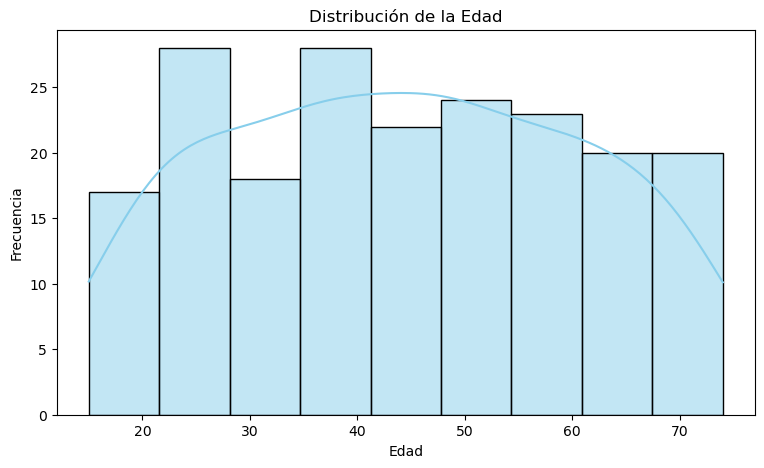

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

In [67]:
#Importa seaborn para tener gráficos más chidos 
# yap, lo puse arriba con las demas librerias para que no se me vaya el pdo xd
#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen

#Crea un displot para de la edad (por ser una variable numérica)

plt.figure(figsize=(9, 5))
sns.histplot(data["Age"], kde=True, color="skyblue")
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Estadísticas descriptivas
data["Age"].describe()


C:\Users\Carlos\AppData\Local\Temp\ipykernel_13372\1006312079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=data, palette="Set2")


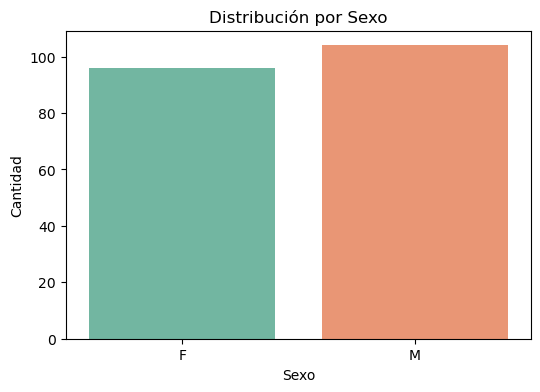

Sex
M    104
F     96
Name: count, dtype: int64

In [68]:
# Género: cuenta cuántos hombres y mujeres hay
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", data=data, palette="Set2")
plt.title("Distribución por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.show()

# Conteo de valores
data["Sex"].value_counts()


C:\Users\Carlos\AppData\Local\Temp\ipykernel_13372\1805309780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="BP", data=data, order=["LOW", "NORMAL", "HIGH"], palette="Set1")


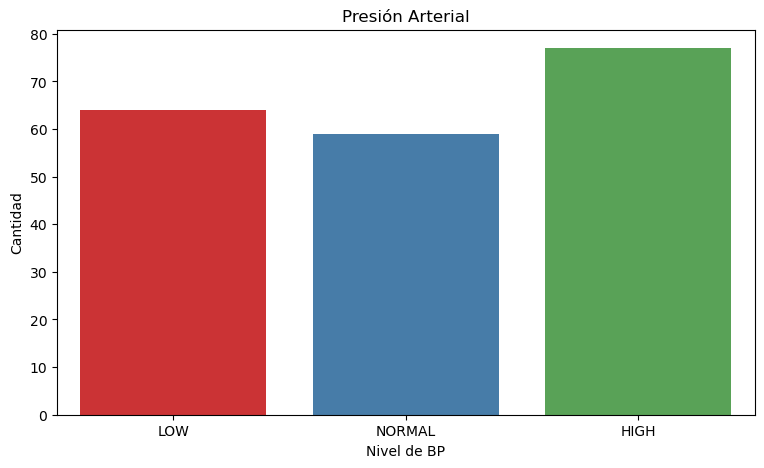

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [69]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize=(9, 5))
sns.countplot(x="BP", data=data, order=["LOW", "NORMAL", "HIGH"], palette="Set1")
plt.title("Presión Arterial")
plt.xlabel("Nivel de BP")
plt.ylabel("Cantidad")
plt.show()

data["BP"].value_counts()


C:\Users\Carlos\AppData\Local\Temp\ipykernel_13372\475793098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cholesterol", data=data, palette="coolwarm")


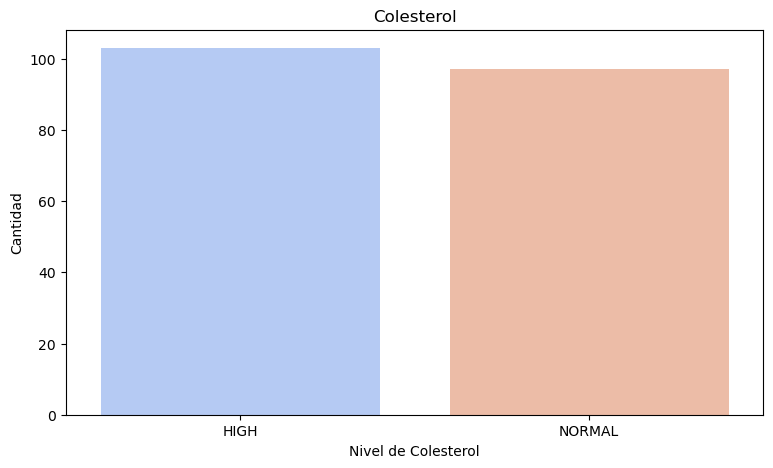

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [70]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize=(9, 5))
sns.countplot(x="Cholesterol", data=data, palette="coolwarm")
plt.title("Colesterol")
plt.xlabel("Nivel de Colesterol")
plt.ylabel("Cantidad")
plt.show()

data["Cholesterol"].value_counts()

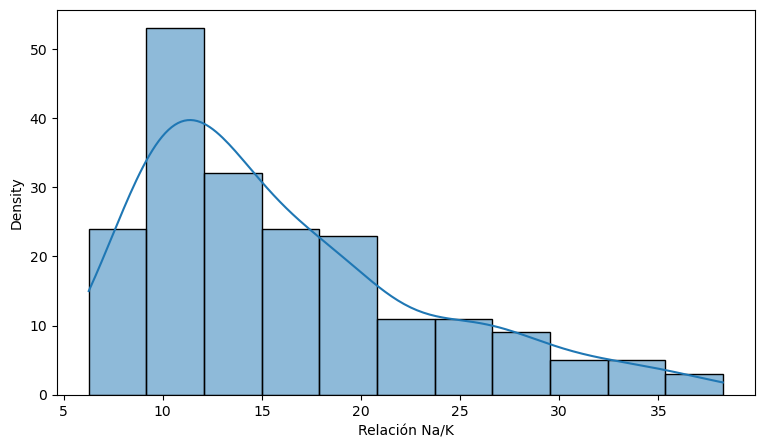

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

In [71]:
# Crea un displot para Sodio Potasio
plt.figure(figsize=(9, 5))
sns.histplot(data["Na_to_K"], kde=True)

plt.xlabel("Relación Na/K")
plt.ylabel("Density")
plt.show()

data["Na_to_K"].describe()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_13372\741780915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Drug", data=data, palette="viridis")


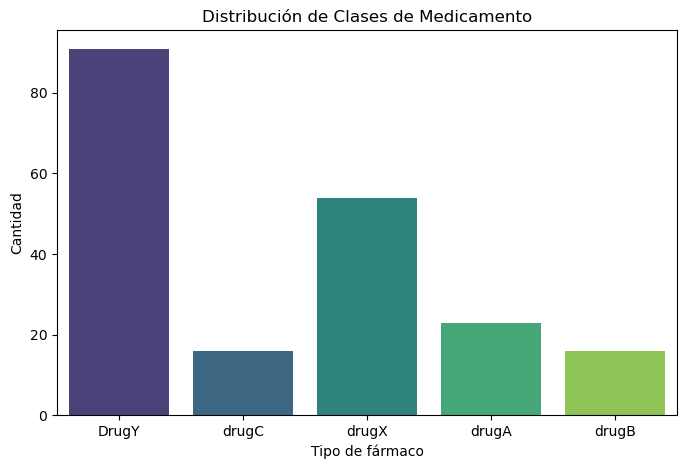

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [72]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize=(8, 5))
sns.countplot(x="Drug", data=data, palette="viridis")
plt.title("Distribución de Clases de Medicamento")
plt.xlabel("Tipo de fármaco")
plt.ylabel("Cantidad")
plt.show()
#Cuenta los medicamentos

data["Drug"].value_counts()


***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


C:\Users\Carlos\AppData\Local\Temp\ipykernel_13372\243579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Drug", y="Age", data=data, palette="Set2")


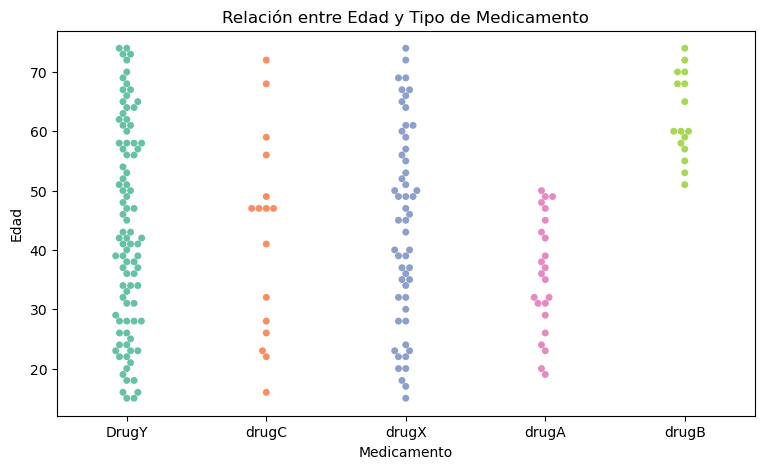

In [73]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize=(9, 5))
sns.swarmplot(x="Drug", y="Age", data=data, palette="Set2")
plt.title("Relación entre Edad y Tipo de Medicamento")
plt.xlabel("Medicamento")
plt.ylabel("Edad")
plt.show()




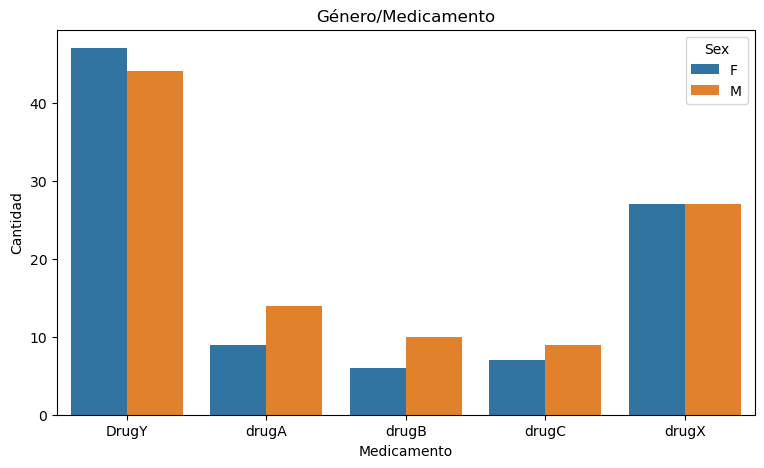

In [74]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
# Agrupar por Drug y Sex, y contar cuántas veces se repite cada combinación
df_Sex_Drug = data.groupby(["Drug", "Sex"]).size().reset_index(name="Count")
df_Sex_Drug


#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9, 5))
sns.barplot(x="Drug", y="Count", hue="Sex", data=df_Sex_Drug)
plt.title("Género/Medicamento")
plt.xlabel("Medicamento")
plt.ylabel("Cantidad")
plt.show()



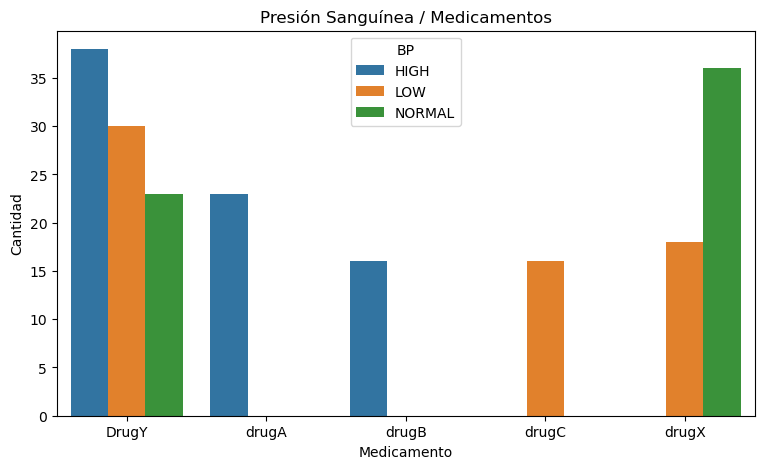

In [75]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = data.groupby(["Drug", "BP"]).size().reset_index(name="Count")
df_BP_Drug

plt.figure(figsize=(9, 5))
sns.barplot(x="Drug", y="Count", hue="BP", data=df_BP_Drug)
plt.title("Presión Sanguínea / Medicamentos")
plt.xlabel("Medicamento")
plt.ylabel("Cantidad")
plt.show()


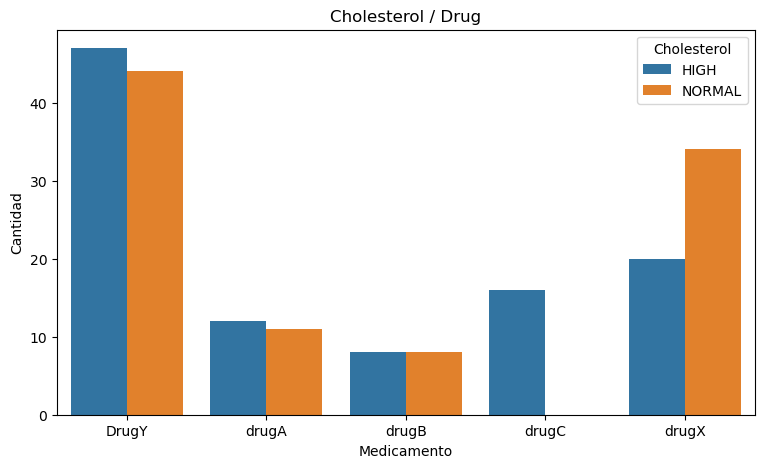

In [76]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_CH_Drug = data.groupby(["Drug", "Cholesterol"]).size().reset_index(name="Count")
df_CH_Drug

plt.figure(figsize=(9, 5))
sns.barplot(x="Drug", y="Count", hue="Cholesterol", data=df_CH_Drug)
plt.title("Cholesterol / Drug")
plt.xlabel("Medicamento")
plt.ylabel("Cantidad")
plt.show()


C:\Users\Carlos\AppData\Local\Temp\ipykernel_13372\2793809595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Drug", y="Na_to_K", data=data, palette="Set3")


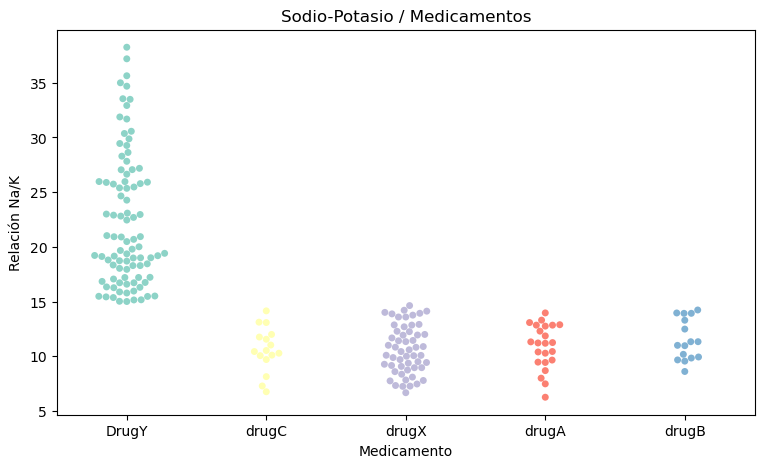

In [77]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize=(9, 5))
sns.swarmplot(x="Drug", y="Na_to_K", data=data, palette="Set3")
plt.title("Sodio-Potasio / Medicamentos")
plt.xlabel("Medicamento")
plt.ylabel("Relación Na/K")
plt.show()


***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [78]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder

# Función que codifica una columna categórica del DataFrame
def label_encoder(columna):
    le = LabelEncoder()
    data[columna] = le.fit_transform(data[columna])

variables = ["Sex", "BP", "Cholesterol", "Drug"]

for var in variables:
    label_encoder(var)

# Mostrar las primeras filas para confirmar la codificación
data.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [79]:
# Crear set de entrenamiento y set de prueba
# Separar los datos en variables independientes (x) y dependiente (y)
x = data.drop(["Drug"], axis=1)
y = data["Drug"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,       # 20% para prueba, 80% para entrenamiento
    random_state=42,     # para reproducibilidad
    shuffle=True         # mezcla aleatoria
)


El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [80]:
## Crear modelo para medicamento
# Crear etiquetas binarias: True si el medicamento es 'DrugY', False si no
y_train_y = (y_train == 3)  # Asegúrate que 3 corresponde a 'DrugY'
y_test_y = (y_test == 3)



Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [81]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
from sklearn.linear_model import SGDClassifier

# Crear el modelo con semilla aleatoria
sgd = SGDClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
sgd.fit(x_train, y_train_y)


SGDClassifier(random_state=42)

In [82]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 

x_train.columns
sgd.predict([[47, 1, 1, 0, 18]])  # Más realista según datos analizados





c:\Users\Carlos\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [83]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score

# Validación cruzada con 3 folds y medida de desempeño basada en 'accuracy'
scores = cross_val_score(sgd, x_train, y_train_y, cv=3, scoring="accuracy")

# Mostrar los resultados
print("Accuracy en cada fold:", scores)
print("Accuracy promedio:", scores.mean())

Accuracy en cada fold: [0.92592593 0.94339623 0.9245283 ]
Accuracy promedio: 0.9312834847426043


 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [84]:
# Modelo que nunca es Y


***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [85]:
# Matriz de confusión
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict

# Obtener predicciones con validación cruzada (CV = 3)
y_train_pred = cross_val_predict(sgd, x_train, y_train_y, cv=3)

#Importar confusion_matrix
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_train_y, y_train_pred)
print("Matriz de Confusión:\n", conf_matrix)

Matriz de Confusión:
 [[149   0]
 [ 11   0]]


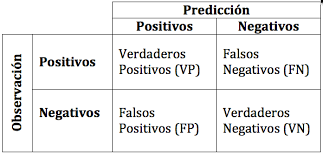

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [86]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score



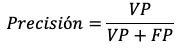

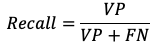

In [87]:
#Cambiar de clasificador
#Importar RandomForestClassifier

#Hacer la matriz de confusión otra vez

from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el clasificador Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train_y)

# Hacer predicciones usando validación cruzada
y_train_pred_rf = cross_val_predict(rfc, x_train, y_train_y, cv=3)

# Ver la nueva matriz de confusión
from sklearn.metrics import confusion_matrix
print("Matriz de confusión Random Forest:")
print(confusion_matrix(y_train_y, y_train_pred_rf))

Matriz de confusión Random Forest:
[[149   0]
 [  9   2]]


In [88]:
#Calcular la precisión y recall con el nuevo clasificador 
# Precision y Recall con el clasificador Random Forest
p_rf = precision_score(y_train_y, y_train_pred_rf)
r_rf = recall_score(y_train_y, y_train_pred_rf)

print("Precision Random Forest:", p_rf)
print("Recall Random Forest:", r_rf)


Precision Random Forest: 1.0
Recall Random Forest: 0.18181818181818182


In [89]:
#Calcular F1
from sklearn.metrics import f1_score

# F1 Score para ambos modelos
f1_sgd = f1_score(y_train_y, y_train_pred)
f1_rf = f1_score(y_train_y, y_train_pred_rf)

print("F1 Score SGD:", f1_sgd)
print("F1 Score Random Forest:", f1_rf)

F1 Score SGD: 0.0
F1 Score Random Forest: 0.3076923076923077


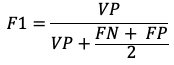

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [90]:
#Puntación de un paciente aleatorio
# Obtener score de decisión para un paciente hipotético
y_score = sgd.decision_function([[47,1,1,0,8]])
print("Puntaje de decisión:", y_score)



Puntaje de decisión: [-2630.35275982]


c:\Users\Carlos\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


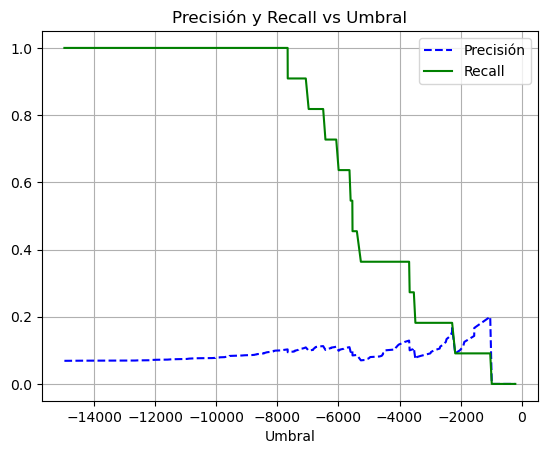

In [91]:
#Graficar la precisión y recall 
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si
# Obtener los decision scores usando cross_val_predict
y_scores = cross_val_predict(sgd, x_train, y_train_y, cv=3, method="decision_function")

# Obtener precisión, recall y umbrales posibles
from sklearn.metrics import precision_recall_curve
precisions, recalls, umbrales = precision_recall_curve(y_train_y, y_scores)

# Graficar precisión y recall vs umbrales
import matplotlib.pyplot as plt
plt.plot(umbrales, precisions[:-1], "b--", label="Precisión")
plt.plot(umbrales, recalls[:-1], "g-", label="Recall")
plt.xlabel("Umbral")
plt.title("Precisión y Recall vs Umbral")
plt.legend()
plt.grid(True)
plt.show()


El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

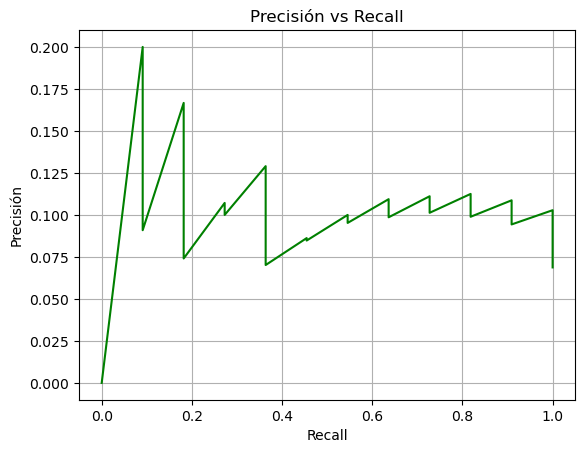

Umbral con al menos 90% de precisión: -14975.38196262718


In [92]:
#Supon que ya lo pensaste y querías un umbral  90 
# Graficar precisión vs recall directamente
# Graficar precisión vs recall directamente
plt.plot(recalls[:-1], precisions[:-1], "g-")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title("Precisión vs Recall")
plt.grid(True)
plt.show()

# Obtener el umbral que da al menos 90% de precisión (usando sólo índices válidos)
import numpy as np
umbral_90 = umbrales[np.argmax(precisions[:-1] >= 0.90)]
print("Umbral con al menos 90% de precisión:", umbral_90)



In [93]:
#Arroja la precisión y recall para un umbral de 90
# Generar predicciones con el nuevo umbral
y_train_90 = (y_scores >= umbral_90)

# Calcular precisión y recall con el nuevo umbral
from sklearn.metrics import precision_score, recall_score
p90 = precision_score(y_train_y, y_train_90)
r90 = recall_score(y_train_y, y_train_90)

print("Precisión con umbral ajustado:", p90)
print("Recall con umbral ajustado:", r90)


Precisión con umbral ajustado: 0.06875
Recall con umbral ajustado: 1.0


***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [109]:
#Importar roc_curve
from sklearn.metrics import roc_curve

# Obtener tasas verdaderas y falsas positivas para el modelo SGD
fpr, tpr, umbrales = roc_curve(y_train_y, y_scores)


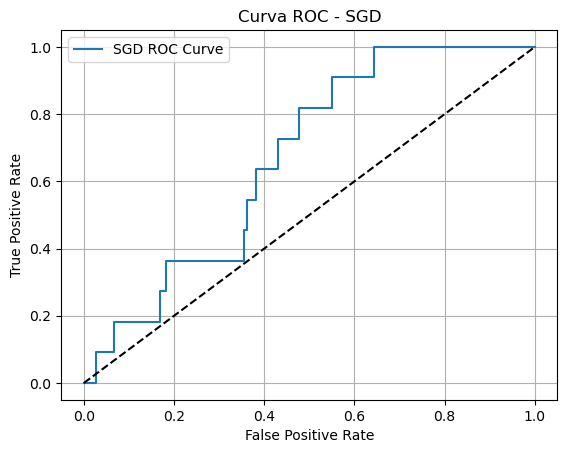

In [110]:
#Graficar la curva ROC

#Poner una cuadrícula

plt.plot(fpr, tpr, label="SGD ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal (azar)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - SGD")
plt.grid()
plt.legend()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [111]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score

# Área bajo la curva ROC para SGD
auc_sgd = roc_auc_score(y_train_y, y_scores)
print("Área bajo la curva ROC (SGD):", auc_sgd)


Área bajo la curva ROC (SGD): 0.6687004270896888


In [112]:
#Compararlo con el modelo de random forest
# Obtener predicciones de probabilidad con Random Forest
y_forest = cross_val_predict(rfc, x_train, y_train_y, cv=3, method="predict_proba")

# Guardar solo las probabilidades de la clase positiva (medicamento Y)
y_scores_forest = y_forest[:, 1]


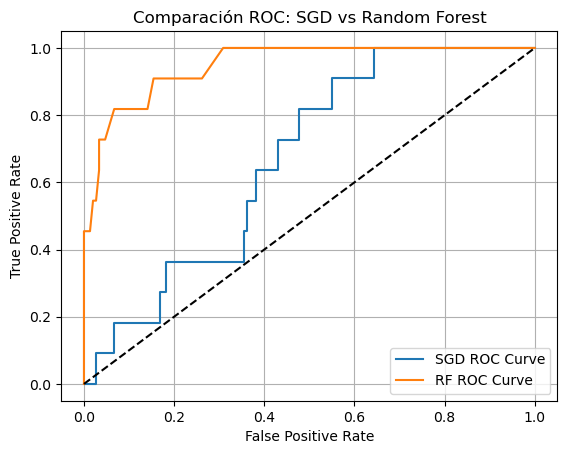

In [113]:
#Graficar la curva ROC y la predicción de random forest 
# Obtener puntos de la curva ROC para Random Forest
fpr_forest, tpr_forest, umbral_forest = roc_curve(y_train_y, y_scores_forest)

# Graficar ambas curvas
plt.plot(fpr, tpr, label="SGD ROC Curve")
plt.plot(fpr_forest, tpr_forest, label="RF ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparación ROC: SGD vs Random Forest")
plt.legend()
plt.grid()
plt.show()


In [114]:
#Calcular el puntaje (área bajo la curva) de random forest  
# Calcular el AUC para Random Forest
auc_rf = roc_auc_score(y_train_y, y_scores_forest)
print("Área bajo la curva ROC (Random Forest):", auc_rf)


Área bajo la curva ROC (Random Forest): 0.9481391092129346


***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [115]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC

#Predecir a un humano aleatorio para ver que todo este funcionando bien 
svm_clf = SVC(random_state=42)
svm_clf.fit(x_train, y_train)

# Tomamos la primera muestra del conjunto de prueba para ver si funciona
humano_aleatorio = x_test.iloc[[0]]
prediccion_svc = svm_clf.predict(humano_aleatorio)

print(f"El humano de prueba es: \n{humano_aleatorio}\n")
print(f"La predicción del modelo SVC es: {prediccion_svc[0]}")
print(f"El valor real es: {y_test.iloc[0]}")


El humano de prueba es: 
    Age  Sex  BP  Cholesterol  Na_to_K
95   36    1   1            1   11.424

La predicción del modelo SVC es: 4
El valor real es: 4


In [116]:
#Utilizar decision_function para observar los puntajes de cada medicina 
puntajes_svc = svm_clf.decision_function(humano_aleatorio)
#Decidirá por el qué tenga mayor puntaje

In [117]:
#Ahora, utiliza el clasificador multiclase 
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)

#Predecir a un humano ahora con este clasificador
prediccion_forest = forest_clf.predict(humano_aleatorio)


In [118]:
#Utilizar decision_function para observar los puntajes de cada medicina 
probabilidades_forest = forest_clf.predict_proba(humano_aleatorio)

print("Clases del modelo:", forest_clf.classes_)
print("Probabilidades para cada clase:", probabilidades_forest)

# Encontramos el índice de la probabilidad más alta
indice_max_prob = np.argmax(probabilidades_forest)
clase_ganadora_forest = forest_clf.classes_[indice_max_prob]

print(f"\nLa clase con la mayor probabilidad es '{clase_ganadora_forest}', que coincide con la predicción.")

Clases del modelo: [0 1 2 3 4]
Probabilidades para cada clase: [[0.   0.01 0.   0.04 0.95]]

La clase con la mayor probabilidad es '4', que coincide con la predicción.


In [121]:
#campararlo con los datos obtenidos de sgd.fit 
# 1. Evaluamos el SGDClassifier (que ya usamos en la parte binaria) en el problema multiclase
# SGD lo maneja automáticamente con una estrategia "One-vs-Rest".
sgd_clf_multi = SGDClassifier(random_state=42)
score_sgd = cross_val_score(sgd_clf_multi, x_train, y_train, cv=3, scoring="accuracy")
print(f"Accuracy promedio de SGD Classifier: {score_sgd.mean():.4f}")

# 2. Evaluamos el SVC
score_svm = cross_val_score(svm_clf, x_train, y_train, cv=3, scoring="accuracy")
print(f"Accuracy promedio de SVC: {score_svm.mean():.4f}")

# 3. Evaluamos el RandomForest
score_forest = cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")
print(f"Accuracy promedio de RandomForest Classifier: {score_forest.mean():.4f}")


Accuracy promedio de SGD Classifier: 0.5241
Accuracy promedio de SVC: 0.6873
Accuracy promedio de RandomForest Classifier: 0.9687


***

## <span style="color:green">8. Analizar Errores</span>

In [123]:
#Hacer un clasificador de random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)

y_train_pred_forest = cross_val_predict(forest_clf, x_train, y_train, cv=3)


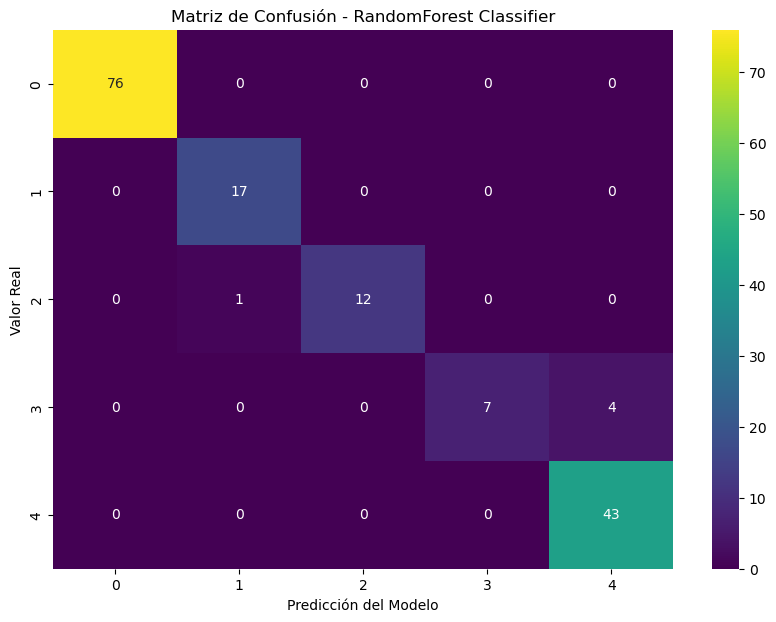

In [124]:
#Utilizar la matriz de confusión 
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred_forest)
labels = np.unique(y_train)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mx, annot=True, fmt='d', cmap='viridis',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - RandomForest Classifier')
plt.show()

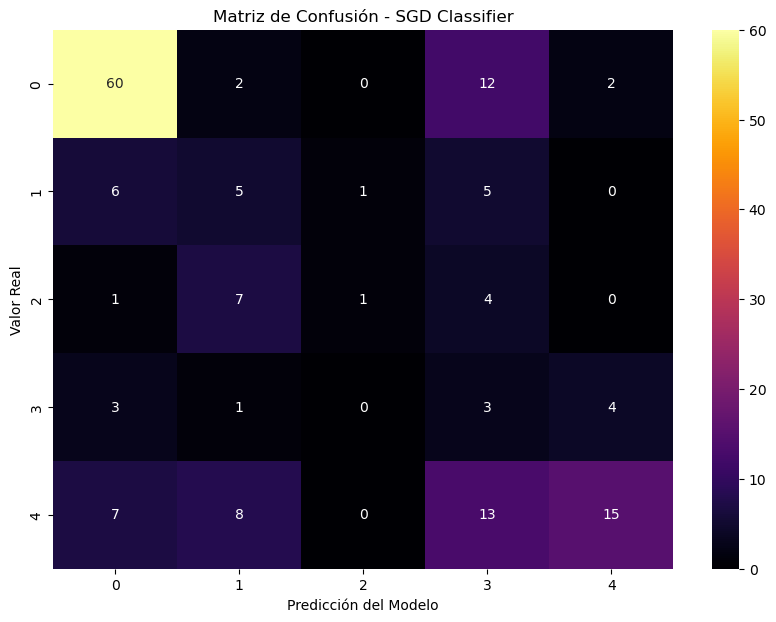

In [125]:
#utilizar ahora SGD
from sklearn.linear_model import SGDClassifier
sgd_clf_multi = SGDClassifier(random_state=42)
y_train_pred_sgd = cross_val_predict(sgd_clf_multi, x_train, y_train, cv=3)
conf_mx_sgd = confusion_matrix(y_train, y_train_pred_sgd)

# Visualizar la matriz de confusión del SGD owo
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mx_sgd, annot=True, fmt='d', cmap='inferno',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SGD Classifier')
plt.show()